### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



El ingreso total de la tienda 1 es de: 1150880400.0 
El ingreso total de la tienda 2 es de: 1116343500.0 
El ingreso total de la tienda 3 es de: 1098019600.0 
El ingreso total de la tienda 4 es de: 1038375700.0 


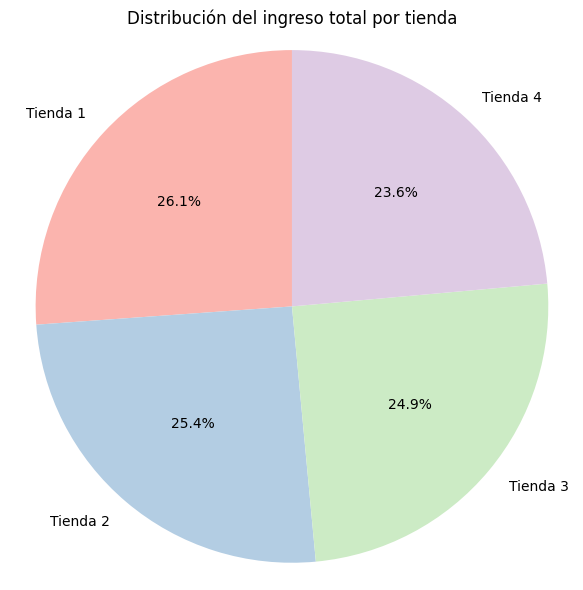

In [90]:
tiendas = [tienda, tienda2, tienda3, tienda4]
p = list()
for i,t in enumerate(tiendas):
    precios = t["Precio"]
    ingreso_total = sum(precios)
    print(f"El ingreso total de la tienda {i+1} es de: {ingreso_total} ")
    p.append(ingreso_total)

plt.figure(figsize=(6, 6))
plt.pie(p, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title("Distribución del ingreso total por tienda")
plt.axis('equal')  # Hace que sea un círculo perfecto
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [38]:
categorias = tienda["Categoría del Producto"]
conjunto_de_categorias = set()
for categoria in categorias:
    conjunto_de_categorias.add(categoria)
diccionario = dict.fromkeys(conjunto_de_categorias,0)
for categoria in categorias:
    diccionario[categoria] = diccionario[categoria] + 1

print(diccionario)

{'Instrumentos musicales': 182, 'Libros': 173, 'Artículos para el hogar': 171, 'Muebles': 465, 'Electrodomésticos': 312, 'Juguetes': 324, 'Deportes y diversión': 284, 'Electrónicos': 448}


In [45]:
for i,t in enumerate(tiendas):
    categorias = t["Categoría del Producto"]
    conjunto_de_categorias = set()
    for categoria in categorias:
        conjunto_de_categorias.add(categoria)
    diccionario = dict.fromkeys(conjunto_de_categorias,0)
    for categoria in categorias:
        diccionario[categoria] = diccionario[categoria] + 1
    print(f"las categorias que vende la tienda {i+1} son: ")
    for clave, valor in diccionario.items():
        print(f"{clave} = {valor}")
    print("____________________________________________")

las categorias que vende la tienda 1 son: 
Instrumentos musicales = 182
Libros = 173
Artículos para el hogar = 171
Muebles = 465
Electrodomésticos = 312
Juguetes = 324
Deportes y diversión = 284
Electrónicos = 448
____________________________________________
las categorias que vende la tienda 2 son: 
Instrumentos musicales = 224
Libros = 197
Artículos para el hogar = 181
Muebles = 442
Electrodomésticos = 305
Juguetes = 313
Deportes y diversión = 275
Electrónicos = 422
____________________________________________
las categorias que vende la tienda 3 son: 
Instrumentos musicales = 177
Libros = 185
Artículos para el hogar = 177
Muebles = 499
Electrodomésticos = 278
Juguetes = 315
Deportes y diversión = 277
Electrónicos = 451
____________________________________________
las categorias que vende la tienda 4 son: 
Instrumentos musicales = 170
Libros = 187
Artículos para el hogar = 201
Muebles = 480
Electrodomésticos = 254
Juguetes = 338
Deportes y diversión = 277
Electrónicos = 451
_________

# 3. Calificación promedio de la tienda


La calificacion de la tienda 0 es de: 3.9767
La calificacion de la tienda 1 es de: 4.0373
La calificacion de la tienda 2 es de: 4.0483
La calificacion de la tienda 3 es de: 3.9958


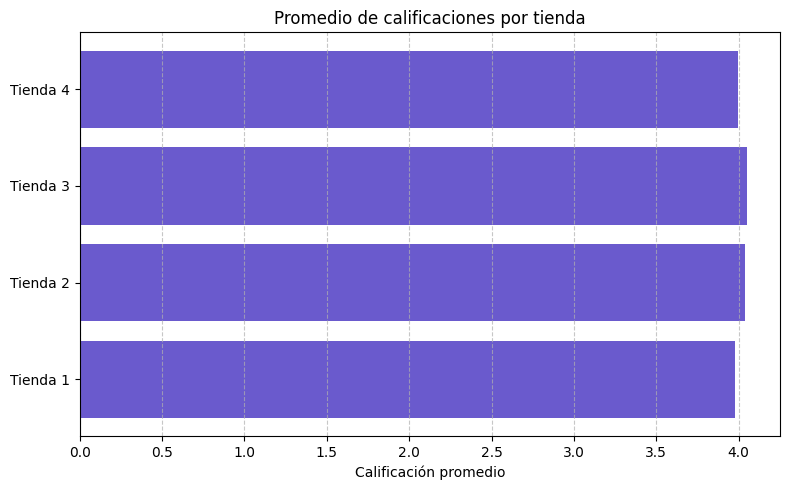

In [89]:
def promedio_De_Calificaciones(t):
    calificaciones = t["Calificación"]
    longitud = len(calificaciones)
    promedio = sum(calificaciones)/longitud
    return promedio
pr = list()
for i,t in enumerate(tiendas):
    print(f"La calificacion de la tienda {i} es de: {round(promedio_De_Calificaciones(t),4)}")
    pr.append(promedio_De_Calificaciones(t))

etiquetas = [f"Tienda {i+1}" for i in range(len(tiendas))]

plt.figure(figsize=(8, 5))
plt.barh(etiquetas, pr, color='slateblue')
plt.title("Promedio de calificaciones por tienda")
plt.xlabel("Calificación promedio")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [77]:
for i,t in enumerate(tiendas):
    maximo = 0
    minimo = float('inf')
    categorias = t["Categoría del Producto"]
    conjunto_de_categorias = set()
    for categoria in categorias:
        conjunto_de_categorias.add(categoria)
    diccionario = dict.fromkeys(conjunto_de_categorias,0)
    for categoria in categorias:
        diccionario[categoria] = diccionario[categoria] + 1
    for clave,valor in diccionario.items():
        if valor > maximo:
            maximo = valor
            ancla = clave
        if valor < minimo:
            minimo = valor
            tope = clave
    print(f"El producto que mas se vendio en la tienda {i+1} fue {ancla} = {diccionario[ancla]}")
    print(f"El producto que menos se vendio en la tienda {i+1} fue {tope} = {diccionario[tope]}")
    print("___________________________________________________________________")

El producto que mas se vendio en la tienda 1 fue Muebles = 465
El producto que menos se vendio en la tienda 1 fue Artículos para el hogar = 171
___________________________________________________________________
El producto que mas se vendio en la tienda 2 fue Muebles = 442
El producto que menos se vendio en la tienda 2 fue Artículos para el hogar = 181
___________________________________________________________________
El producto que mas se vendio en la tienda 3 fue Muebles = 499
El producto que menos se vendio en la tienda 3 fue Instrumentos musicales = 177
___________________________________________________________________
El producto que mas se vendio en la tienda 4 fue Muebles = 480
El producto que menos se vendio en la tienda 4 fue Instrumentos musicales = 170
___________________________________________________________________


# 5. Envío promedio por tienda

El costo de envio de la tienda 0 es de: 26018.61
El costo de envio de la tienda 1 es de: 25216.24
El costo de envio de la tienda 2 es de: 24805.68
El costo de envio de la tienda 3 es de: 23459.46


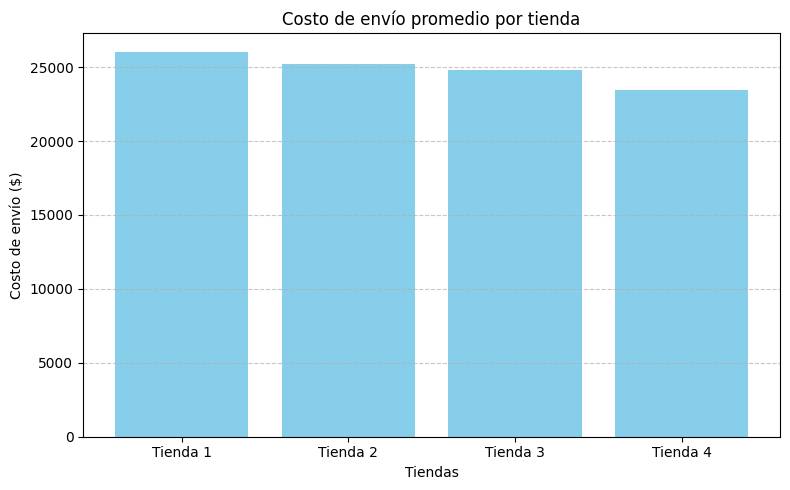

In [83]:
import matplotlib.pyplot as plt

promedios = list()

def costo_de_envio(t):
    costo = t["Costo de envío"]
    longitud = len(costo)
    promedio = sum(costo)/longitud
    return promedio

for i,t in enumerate(tiendas):
    promedios.append(costo_de_envio(t))
    print(f"El costo de envio de la tienda {i} es de: {round(costo_de_envio(t),2)}")

etiquetas = [f"Tienda {i+1}" for i in range(len(tiendas))]
plt.figure(figsize=(8, 5))
plt.bar(etiquetas, promedios, color='skyblue')
plt.title("Costo de envío promedio por tienda")
plt.ylabel("Costo de envío ($)")
plt.xlabel("Tiendas")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [4]:
print("Con el objetivo de mejorar la rentabilidad y eficiencia operativa del negocio, se realizó un análisis integral del desempeño de nuestras cuatro tiendas físicas. Este estudio considera los ingresos generados, la diversidad y volumen de productos vendidos, la satisfacción del cliente (calificaciones), y los costos de envío. Con base en estos factores, se recomienda el cierre de la tienda con menor desempeño relativo.")
print("Tienda 4 presenta el ingreso más bajo, con una diferencia de más de 112 millones de pesos respecto a la tienda con mayores ventas (Tienda 1).")
print("La Tienda 4 también muestra la calificación más baja entre las cuatro, lo que puede indicar oportunidades no resueltas en atención o calidad del servicio")
print("Tienda 4 tiene la menor cantidad de productos vendidos en Instrumentos musicales (170), y aunque tiene buen volumen en otras categorías (como Muebles: 480), su volumen global es inferior al de tiendas como la 1 y 3. En general, Tienda 4 muestra menos fortaleza en categorías clave que generan ventas significativas en las demás.")
print("Aunque la Tienda 4 tiene el menor costo de envío, este ahorro no compensa el bajo ingreso total ni la menor calificación.")
print("Tras evaluar ingresos, calificaciones, volumen de productos y costos logísticos, se concluye que la Tienda 4 es la que muestra menor desempeño global. Sus ingresos son los más bajos, tiene la peor calificación de clientes y ofrece menor volumen de productos en algunas categorías clave. A pesar de tener costos de envío ligeramente más bajos, estos no justifican su continuidad frente al resto.")

Con el objetivo de mejorar la rentabilidad y eficiencia operativa del negocio, se realizó un análisis integral del desempeño de nuestras cuatro tiendas físicas. Este estudio considera los ingresos generados, la diversidad y volumen de productos vendidos, la satisfacción del cliente (calificaciones), y los costos de envío. Con base en estos factores, se recomienda el cierre de la tienda con menor desempeño relativo.
Tienda 4 presenta el ingreso más bajo, con una diferencia de más de 112 millones de pesos respecto a la tienda con mayores ventas (Tienda 1).
La Tienda 4 también muestra la calificación más baja entre las cuatro, lo que puede indicar oportunidades no resueltas en atención o calidad del servicio
Tienda 4 tiene la menor cantidad de productos vendidos en Instrumentos musicales (170), y aunque tiene buen volumen en otras categorías (como Muebles: 480), su volumen global es inferior al de tiendas como la 1 y 3. En general, Tienda 4 muestra menos fortaleza en categorías clave que 